In [2]:
import os
#os.chdir('/Users/rupesh.karn/Desktop/WorkPart-1/UNSW-NB15 Dataset')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
import numpy as np

In [67]:
#Type-2
np.random.seed(2)
x1 = np.random.rand(1000000,1)
x2 =3*np.random.rand(1000000,1)
x3 = x1+np.random.rand(1000000,1)
x4 = 0.5324*x2+np.random.rand(1000000,1)
x5 = x4*x3+np.random.rand(1000000,1)
x6 = x1+np.random.rand(1000000,1)
x7 =2*np.random.rand(1000000,1)
x8 = x6+np.random.rand(1000000,1)
x9 = 0.5324*x2+np.random.rand(1000000,1)
x10 = x8*x2+np.random.rand(1000000,1)
x11 = x4+np.random.rand(1000000,1)
x12 =8*np.random.rand(1000000,1)
x13 = x9*np.random.rand(1000000,1)
x14 = 0.824*x12+np.random.rand(1000000,1)
x15 = x14*x3+np.random.rand(1000000,1)
x16 = x7+np.random.rand(1000000,1)
x17 =9*np.random.rand(1000000,1)
x18 = x17+np.random.rand(1000000,1)
x19 = 0.24*x12+np.random.rand(1000000,1)
x20 = x7+x3+np.random.rand(1000000,1)

X=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20), axis=1)
Y=[]
label=0
for i in range(1000000):
    Y.append(label)
    if i%50000 == 0:
        label=label+1
Y = np.array(Y)
print ('shape of X and Y ',X.shape,Y.shape)
lalbels_length = len(set(Y))
print('Labels length: ',lalbels_length,'. They are: ',set(Y))
print("Datasetset Formatting")
for j in range(0,20):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y, test_size=0.33)
print (X_train.shape,X_test.shape,Y_train_all_attacks.shape,Y_test_all_attacks.shape)

shape of X and Y  (1000000, 20) (1000000,)
Labels length:  21 . They are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
(670000, 20) (330000, 20) (670000,) (330000,)


In [68]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf
slim = tf.contrib.slim
graph_replace = tf.contrib.graph_editor.graph_replace

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("ticks")

from tqdm import trange, tqdm

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

select = tf.select if hasattr(tf, 'select') else tf.where

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['average', 'maximum', 'select']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [69]:
# Data params
input_dim = 20
output_dim = lalbels_length

# Network params
n_hidden_units = 41
activation_fn = tf.nn.relu

# Optimization params
batch_size = 64
epochs_per_task = 10

n_stats = 1

# Reset optimizer after each age
reset_optimizer = True

In [70]:
from keras.utils import np_utils

#task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,17],[18,19],[20,21],[22,23],[24,25],[26,27],[28,29],[30,31],[32,33],[34,35],[36,37],[38,39]]
#nb_classes  = 40
task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,17],[18,19],[20,1]]
nb_classes  = lalbels_length
#task_labels = [[8,9], [6,7], [4,5], [2,3], [0,1]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8,9]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
#task_labels = [[0,1], [2,3], [4,5], [6,7], [8,9],[1,5],[0,9],[3,8],[0,6],[4,2],[3,5],[0,4],[9,6],[1,2]]
n_tasks = len(task_labels)
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)

In [71]:
for i in range(n_tasks):
    print('Task:',i,training_datasets[i][0].shape,training_datasets[i][1].shape,validation_datasets[i][0].shape,validation_datasets[i][1].shape)

Task: 0 (33239, 20) (33239, 21) (16762, 20) (16762, 21)
Task: 1 (67249, 20) (67249, 21) (32751, 20) (32751, 21)
Task: 2 (66959, 20) (66959, 21) (33041, 20) (33041, 21)
Task: 3 (66918, 20) (66918, 21) (33082, 20) (33082, 21)
Task: 4 (66833, 20) (66833, 21) (33167, 20) (33167, 21)
Task: 5 (67115, 20) (67115, 21) (32885, 20) (32885, 21)
Task: 6 (66937, 20) (66937, 21) (33063, 20) (33063, 21)
Task: 7 (67243, 20) (67243, 21) (32757, 20) (32757, 21)
Task: 8 (67169, 20) (67169, 21) (32831, 20) (32831, 21)
Task: 9 (66918, 20) (66918, 21) (33082, 20) (33082, 21)
Task: 10 (66658, 20) (66658, 21) (33341, 20) (33341, 21)


In [72]:
tf.reset_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())
import keras.backend as K
import keras.activations as activations

output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)

def masked_softmax(logits):
    # logits are [batch_size, output_dim]
    x = select(tf.tile(tf.equal(output_mask[None, :], 1.0), [tf.shape(logits)[0], 1]), logits, -1e32 * tf.ones_like(logits))
    return activations.softmax(x)

def set_active_outputs(labels):
    new_mask = np.zeros(output_dim)
    for l in labels:
        new_mask[l] = 1.0
    sess.run(output_mask.assign(new_mask))
    #print(sess.run(output_mask))
    
def masked_predict(model, data, targets):
    pred = model.predict(data)
    #print(pred)
    acc = np.argmax(pred,1)==np.argmax(targets,1)
    return acc.mean()

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(n_hidden_units, kernel_initializer='random_uniform', activation=activation_fn, input_shape=(input_dim,)))
#model.add(Dense(n_hidden_units, kernel_initializer='random_uniform', activation=activation_fn))
#model.add(Dense(n_hidden_units, activation=activation_fn))
model.add(Dense(output_dim, kernel_initializer='random_uniform', activation=masked_softmax))
#model.add(Dense(output_dim, kernel_initializer='random_uniform', activation=masked_softmax, input_shape=(input_dim,)))

from pathint import protocols
from pathint.optimizers import KOOptimizer
from keras.optimizers import Adam, RMSprop,SGD
from keras.callbacks import Callback
from pathint.keras_utils import LossHistory

#protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
#protocol_name, protocol = protocols.FISHER_PROTOCOL('sum')
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
#opt = SGD(1e-3)
#opt = RMSprop(lr=1e-3)
oopt = KOOptimizer(opt, model=model, **protocol)
model.compile(loss='categorical_crossentropy', optimizer=oopt, metrics=['accuracy'])
model.model._make_train_function()
saved_weights = model.get_weights()

history = LossHistory()
callbacks = [history]
datafile_name = "split_mnist_data_%s.pkl.gz"%protocol_name

In [74]:
print(protocol)

{'regularizer_fn': <function quadratic_regularizer at 0x7fb262bcd1e0>, 'init_updates': [('cweights', <function <lambda>.<locals>.<lambda> at 0x7fb26c6e6620>)], 'step_updates': [('grads2', <function <lambda>.<locals>.<lambda> at 0x7fb26c7fd8c8>)], 'task_updates': [('omega', <function <lambda>.<locals>.<lambda> at 0x7fb2406fe158>), ('cweights', <function <lambda>.<locals>.<lambda> at 0x7fb2406feae8>), ('grads2', <function <lambda>.<locals>.<lambda> at 0x7fb2406fe9d8>)]}


In [75]:
def run_fits(cvals, training_data, valid_data, eval_on_train_set=False, nstats=1):
    acc_mean = dict()
    acc_std = dict()
    model_weights_save = []   #Empty list to save the model weights aftertraining each task
    #model_weights_save.append(model.get_weights())
    for cidx, cval_ in enumerate(tqdm(cvals)):
        runs = []
        for runid in range(nstats):
            sess.run(tf.global_variables_initializer())
            # model.set_weights(saved_weights)
            cstuffs = []
            evals = []
            print("setting cval")
            cval = cval_
            oopt.set_strength(cval)
            oopt.init_task_vars()
            print("cval is", sess.run(oopt.lam))
            for age, tidx in enumerate(range(n_tasks)):
                print("Age %i, cval is=%f"%(age,cval))
                print("settint output mask")
                set_active_outputs(task_labels[age])
                stuffs = model.fit(training_data[tidx][0], training_data[tidx][1], batch_size, epochs_per_task, callbacks=callbacks)
                oopt.update_task_metrics(training_data[tidx][0], training_data[tidx][1], batch_size)
                oopt.update_task_vars()
                ftask = []
                model_weights_save.append(model.get_weights()) #Save the model weights aftertraining each task
                for j in range(n_tasks):
                    set_active_outputs(task_labels[j])
                    if eval_on_train_set:
                        f_ = masked_predict(model, training_data[j][0], training_data[j][1])
                    else:
                        f_ = masked_predict(model, valid_data[j][0], valid_data[j][1])
                    ftask.append(np.mean(f_))
                evals.append(ftask)
                cstuffs.append(stuffs)

                # Re-initialize optimizater variables
                if reset_optimizer:
                    oopt.reset_optimizer()

            evals = np.array(evals)
            runs.append(evals)
        
        runs = np.array(runs)
        acc_mean[cval_] = runs.mean(0)
        acc_std[cval_] = runs.std(0)
    return dict(mean=acc_mean, std=acc_std),model_weights_save

In [76]:
# cvals = np.concatenate(([0], np.logspace(-2, 2, 10)))
# cvals = np.concatenate(([0], np.logspace(-1, 2, 2)))
# cvals = np.concatenate(([0], np.logspace(-2, 0, 3)))
#cvals = np.logspace(-3, 3, 7)#[0, 1.0, 2, 5, 10]
cvals = [0, 1.0]
print(cvals)

[0, 1.0]


In [77]:
#%%capture

recompute_data = True

if recompute_data:
    data,model_weights_save = run_fits(cvals, training_datasets, validation_datasets, eval_on_train_set=False, nstats=n_stats)
    utils.save_zipped_pickle(data, datafile_name)

  0%|          | 0/2 [00:00<?, ?it/s]

setting cval
cval is 0.0
Age 0, cval is=0.000000
settint output mask
Epoch 1/10
33239/33239 [==============================] - 1s - loss: 0.0539 - acc: 0.9997     
Epoch 2/10
33239/33239 [==============================] - 0s - loss: 8.6208e-04 - acc: 1.0000     
Epoch 3/10
33239/33239 [==============================] - 0s - loss: 5.6915e-04 - acc: 1.0000     
Epoch 4/10
33239/33239 [==============================] - 0s - loss: 5.0355e-04 - acc: 1.0000     
Epoch 5/10
33239/33239 [==============================] - 0s - loss: 4.8586e-04 - acc: 1.0000     
Epoch 6/10
33239/33239 [==============================] - 0s - loss: 4.7692e-04 - acc: 1.0000     
Epoch 7/10
33239/33239 [==============================] - 0s - loss: 4.7303e-04 - acc: 1.0000     
Epoch 8/10
33239/33239 [==============================] - 1s - loss: 4.7007e-04 - acc: 1.0000     
Epoch 9/10
33239/33239 [==============================] - 0s - loss: 4.6879e-04 - acc: 1.0000     
Epoch 10/10
33239/33239 [===================

67169/67169 [==============================] - 1s - loss: 0.6932 - acc: 0.4945     
Epoch 3/10
67169/67169 [==============================] - 1s - loss: 0.6932 - acc: 0.5011     
Epoch 4/10
67169/67169 [==============================] - 1s - loss: 0.6932 - acc: 0.5005     
Epoch 5/10
67169/67169 [==============================] - 1s - loss: 0.6932 - acc: 0.4984     
Epoch 6/10
67169/67169 [==============================] - 1s - loss: 0.6932 - acc: 0.4961     
Epoch 7/10
67169/67169 [==============================] - 1s - loss: 0.6932 - acc: 0.5001     
Epoch 8/10
67169/67169 [==============================] - 2s - loss: 0.6932 - acc: 0.4994     
Epoch 9/10
67169/67169 [==============================] - 2s - loss: 0.6932 - acc: 0.5009     
Epoch 10/10
67169/67169 [==============================] - 1s - loss: 0.6932 - acc: 0.4992     
Age 9, cval is=0.000000
settint output mask
Epoch 1/10
66918/66918 [==============================] - 1s - loss: 0.6932 - acc: 0.5011     
Epoch 2/10
66918

 50%|█████     | 1/2 [04:21<04:21, 261.85s/it]

setting cval
cval is 1.0
Age 0, cval is=1.000000
settint output mask
Epoch 1/10
33239/33239 [==============================] - 0s - loss: 0.0565 - acc: 0.9996     
Epoch 2/10
33239/33239 [==============================] - 0s - loss: 9.4500e-04 - acc: 1.0000     
Epoch 3/10
33239/33239 [==============================] - 0s - loss: 6.0286e-04 - acc: 1.0000     
Epoch 4/10
33239/33239 [==============================] - 0s - loss: 5.1563e-04 - acc: 1.0000     
Epoch 5/10
33239/33239 [==============================] - 0s - loss: 4.8830e-04 - acc: 1.0000     
Epoch 6/10
33239/33239 [==============================] - 0s - loss: 4.7666e-04 - acc: 1.0000     
Epoch 7/10
33239/33239 [==============================] - 0s - loss: 4.6624e-04 - acc: 1.0000     
Epoch 8/10
33239/33239 [==============================] - 0s - loss: 4.6886e-04 - acc: 1.0000     
Epoch 9/10
33239/33239 [==============================] - 0s - loss: 4.6458e-04 - acc: 1.0000     
Epoch 10/10
33239/33239 [===================

67169/67169 [==============================] - 2s - loss: 0.6942 - acc: 0.5004     
Epoch 3/10
67169/67169 [==============================] - 1s - loss: 0.6944 - acc: 0.4981     
Epoch 4/10
67169/67169 [==============================] - 2s - loss: 0.6939 - acc: 0.5022     
Epoch 5/10
67169/67169 [==============================] - 1s - loss: 0.6943 - acc: 0.4971     
Epoch 6/10
67169/67169 [==============================] - 2s - loss: 0.6939 - acc: 0.4984     
Epoch 7/10
67169/67169 [==============================] - 1s - loss: 0.6940 - acc: 0.4999     
Epoch 8/10
67169/67169 [==============================] - 1s - loss: 0.6942 - acc: 0.5002     
Epoch 9/10
67169/67169 [==============================] - 1s - loss: 0.6943 - acc: 0.4998     
Epoch 10/10
67169/67169 [==============================] - 1s - loss: 0.6940 - acc: 0.5019     
Age 9, cval is=1.000000
settint output mask
Epoch 1/10
66918/66918 [==============================] - 1s - loss: 0.6951 - acc: 0.4996     
Epoch 2/10
66918

100%|██████████| 2/2 [08:43<00:00, 261.71s/it]


In [78]:
import h5py
print(model.summary())
model.save_weights('saved_weights.h5') #This file cannot be opend normaly to view the weghts. It can be loaded through load_model() or can be opend via hdf5 viewer

#Shape of the array containg model weights
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

#a_list[0][0][0] = a_list[0][0][0]+0.00001
#print(a_list[0][0][0])
#model.set_weights(a_list)

#from keras.utils.vis_utils import plot_model
#import pydot
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 41)                861       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                882       
Total params: 1,743
Trainable params: 1,743
Non-trainable params: 0
_________________________________________________________________
None
(20, 41)
(41,)
(41, 21)
(21,)


In [79]:
data = utils.load_zipped_pickle(datafile_name)
print(cvals)

[0, 1.0]


In [33]:
'''
print(data['mean'])
for k in cvals:
    for i in range(n_tasks):
        for j in range(i):
            data['mean'][k][j][i] = 0
            data['std'][k][j][i] = 0
'''

{0: array([[0.53809524, 0.30994152, 0.51470588, 0.61083744, 0.56118143,
        0.52439024, 0.48358209, 0.60721757, 0.70200108, 0.35001296,
        0.53306746],
       [0.53809524, 0.53216374, 0.51470588, 0.61083744, 0.56118143,
        0.52439024, 0.48358209, 0.60721757, 0.70200108, 0.35001296,
        0.53306746],
       [0.53809524, 0.53216374, 0.5       , 0.61083744, 0.56118143,
        0.52439024, 0.48358209, 0.60721757, 0.70200108, 0.35001296,
        0.53306746],
       [0.53809524, 0.53216374, 0.5       , 0.46059113, 0.56118143,
        0.52439024, 0.48358209, 0.60721757, 0.70200108, 0.35001296,
        0.53306746],
       [0.53809524, 0.53216374, 0.5       , 0.46059113, 0.46413502,
        0.52439024, 0.48358209, 0.60721757, 0.70200108, 0.35001296,
        0.53306746],
       [0.53809524, 0.53216374, 0.5       , 0.46059113, 0.46413502,
        0.68902439, 0.48358209, 0.60721757, 0.70200108, 0.35001296,
        0.53306746],
       [0.53809524, 0.53216374, 0.5       , 0.46059113

In [80]:
import matplotlib.colors as colors
cmap = plt.get_cmap('cool') 
cNorm  = colors.Normalize(vmin=-5, vmax=np.log(np.max(list(data['mean'].keys()))))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
print(scalarMap.get_clim())

(-5.0, 0.0)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


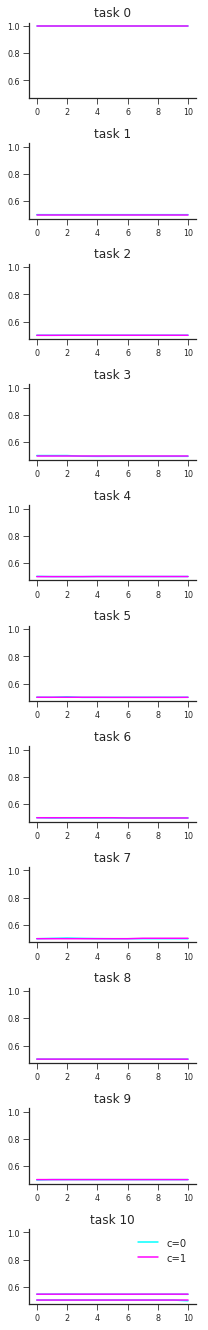

In [81]:
figure(figsize=(3, 20))
axs = [subplot(n_tasks+1,1,1)]#, None, None]
for i in range(1, n_tasks):
    axs.append(subplot(n_tasks+1,1, i+1, sharex=axs[0], sharey=axs[0]))
    
keys = list(data['mean'].keys())
sorted_keys = np.sort(keys)

for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
        colorVal = scalarMap.to_rgba(np.log(cval))
        # axs[j].plot(evals[:, j], c=colorVal)
        axs[j].errorbar(range(n_tasks), mean_vals[:, j], yerr=std_vals[:, j]/np.sqrt(n_stats), c=colorVal)
        axs[j].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    label = "c=%g"%cval
    average = mean_vals.mean(1)  #Taking the average of cross validation accuracies accross all tasks after learning each task
    axs[-1].plot(average, c=colorVal, label=label)
    
for i, ax in enumerate(axs):
    ax.legend(loc='best')
    ax.set_title((['task %d'%j for j in range(n_tasks)] + ['average'])[i])
gcf().tight_layout()
sns.despine()
plt.savefig('2Attack_Accuracy_10task.pdf')

In [82]:
for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
       print(mean_vals[:, j],std_vals[:, j]/np.sqrt(n_stats))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.50007633 0.49992367 0.49992367 0.49992367 0.49992367 0.49992367
 0.49992367 0.49992367 0.49992367 0.49992367 0.49992367] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.50022699 0.50007566 0.50022699 0.50022699 0.50022699 0.50022699
 0.50022699 0.50022699 0.50022699 0.50022699 0.50022699] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.50290188 0.50290188 0.50290188 0.49764222 0.49667493 0.49709812
 0.49709812 0.49709812 0.49709812 0.49709812 0.49709812] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.5015829  0.49968342 0.49965327 0.49965327 0.50055778 0.50034673
 0.50034673 0.50034673 0.50034673 0.50034673 0.50034673] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.49968071 0.49943743 0.50311692 0.49876844 0.49873803 0.49968071
 0.49968071 0.49968071 0.49968071 0.49968071 0.49968071] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.50089224 0.49871458 0.49910776 0.49910776 0.49910776 0.49910776
 0.49910776 0.49910776 0.49910776 0.49910776 0.49910776] [0. 0. 0. 0

In [83]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


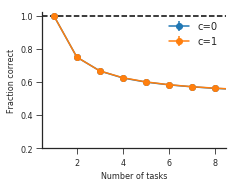

In [84]:
#Fractional Correctness = Average of cross validation accuracies of learned tasks only after training each task 
fig = plt.figure(figsize=(3.3,2.5))
ax = plt.subplot(111)

for cval in sorted_keys:
    mean_stuff = []
    std_stuff = []
    for i in range(len(data['mean'][cval])):
        mean_stuff.append(data['mean'][cval][i][:i+1].mean())
        std_stuff.append(np.sqrt((data['std'][cval][i][:i+1]**2).sum())/(n_stats*np.sqrt(n_stats)))
    # plot(range(1,n_tasks+1), mean_stuff, 'o-', label="c=%g"%cval)
    errorbar(range(1,n_tasks+1), mean_stuff, yerr=std_stuff, fmt='o-', label="c=%g"%cval)
        
axhline(data['mean'][cval][0][0], linestyle='--', color='k')
xlabel('Number of tasks')
ylabel('Fraction correct')
legend(loc='best')
xlim(0.5, 8.5)
ylim(0.2, 1.02)
# grid('on')
# sns.despine()
simple_axis(ax)
plt.savefig('2attack_fractional_correct_UNSW.pdf')

In [85]:
import pandas as pd
from numpy.linalg import matrix_rank
import math
corr_matrix = []
corr_row = []
Rank_corr_matrix=[]
for j in range(n_tasks):
    df = pd.DataFrame(training_datasets[j][0])
    correlation_matrix = df.corr().values
    correlation_matrix = np.nan_to_num(correlation_matrix)
    for k in range(len(correlation_matrix)):
        for i in range(len(correlation_matrix)):
            corr_elem = (math.ceil(correlation_matrix[k][i]*1e10)/1e10)
            corr_row.append(np.around(corr_elem))
        corr_matrix.append(corr_row)
        corr_row = []
    rank_corr_matrix=np.linalg.matrix_rank(np.asarray(corr_matrix))
    Rank_corr_matrix.append(rank_corr_matrix)
    print('Rank of the Autocorrelation Matrix for task=',j,'is :',rank_corr_matrix)
    corr_matrix = []

Rank of the Autocorrelation Matrix for task= 0 is : 10
Rank of the Autocorrelation Matrix for task= 1 is : 10
Rank of the Autocorrelation Matrix for task= 2 is : 10
Rank of the Autocorrelation Matrix for task= 3 is : 10
Rank of the Autocorrelation Matrix for task= 4 is : 10
Rank of the Autocorrelation Matrix for task= 5 is : 10
Rank of the Autocorrelation Matrix for task= 6 is : 10
Rank of the Autocorrelation Matrix for task= 7 is : 10
Rank of the Autocorrelation Matrix for task= 8 is : 10
Rank of the Autocorrelation Matrix for task= 9 is : 10
Rank of the Autocorrelation Matrix for task= 10 is : 10


In [86]:
corr_matrix = []
corr_row = []
Rank_corr_matrix=[]
for j in range(1,n_tasks):
    for m in range(j):
        curr_task = training_datasets[j][0]
        prev_task = training_datasets[m][0]
        correlation_matrix = np.corrcoef(curr_task,prev_task)
        correlation_matrix = np.nan_to_num(correlation_matrix)
        for k in range(len(correlation_matrix)):
            for i in range(len(correlation_matrix)):
                corr_elem = (math.ceil(correlation_matrix[k][i]*1e5)/1e5)
                corr_row.append(np.around(corr_elem))
            corr_matrix.append(corr_row)
            corr_row = []
        rank_corr_matrix=np.linalg.matrix_rank(np.asarray(corr_matrix))
        Rank_corr_matrix.append(rank_corr_matrix)
        print('Rank of the Cross-correlation Matrix of shape {0} between task {1} and {2} is: {3}'.format(correlation_matrix.shape,j,m,rank_corr_matrix))
        corr_matrix = []

MemoryError: 

In [44]:
mean_stuff = [0.897,0.9301,0.9498,0.8902,0.8321]
print(len(model_weights_save))

11


In [158]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+50 
for i in range(n_tasks):   
    Extract_model_params.append(Flatten_weights[i])

In [177]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for i in range(n_tasks):   
    Extract_model_params.append(Flatten_weights[i])
    
gradient_save=[]
for i in range(1,len(Extract_model_params)):
    temp=list(np.asarray(Extract_model_params[i-1])-np.asarray(Extract_model_params[i]))
    
    gradient = [j/0.001 for j in temp]
    gradient_save.append(gradient)
    
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
Rank_Hessian_matrix = []
for k in range(len(gradient_save)):
    for i in range(len(gradient_save[k])):
        partial_deriv_1 = (math.ceil(gradient_save[k][i]*1e10)/1e10)
        for j in range(len(gradient_save[k])):
            partial_deriv_2 = (math.ceil(gradient_save[k][j]*1e10)/1e10)
            Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
        Hessian_matrix.append(Hessian_row)
        Hessian_row = []
    rank_Hessian_matrix = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
    Rank_Hessian_matrix.append(rank_Hessian_matrix)
    print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)
    Hessian_matrix = []

Rank of the Hessian Matrix after task= 0 is : 152
Rank of the Hessian Matrix after task= 1 is : 141
Rank of the Hessian Matrix after task= 2 is : 155
Rank of the Hessian Matrix after task= 3 is : 158
Rank of the Hessian Matrix after task= 4 is : 139
Rank of the Hessian Matrix after task= 5 is : 141
Rank of the Hessian Matrix after task= 6 is : 135
Rank of the Hessian Matrix after task= 7 is : 115
Rank of the Hessian Matrix after task= 8 is : 30


In [24]:
#Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
#2. Manhattan Distance
def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))
#3.  Minkowski distance 
from decimal import Decimal
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)
def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
#4. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
#5. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
#6. Using Heuristic    
import difflib 

for i in [0,1,2,3,4,5,6,7,8]:
    print("Eucledian Parameter shift after task {0} :".format(i+1),euclidean_distance(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7,8]:
    print("Cosine Parameter shift after task {0} :".format(i+1),cosine_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7,8]:
    print("Jaccard Parameter shift after task {0} :".format(i+1),jaccard_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7,8]:
    print("Heuristic Parameter shift after task {0} :".format(i+1),difflib.SequenceMatcher(None,Extract_model_params[i],Extract_model_params[i+1]).ratio())

Eucledian Parameter shift after task 1 : 18.42116476268859
Eucledian Parameter shift after task 2 : 9.208601450530098
Eucledian Parameter shift after task 3 : 3.934590313084037
Eucledian Parameter shift after task 4 : 0.7763082720953064
Eucledian Parameter shift after task 5 : 2.4158320680373264
Eucledian Parameter shift after task 6 : 2.6746329869635184
Eucledian Parameter shift after task 7 : 5.5886347410127915
Eucledian Parameter shift after task 8 : 3.289132188129787
Eucledian Parameter shift after task 9 : 3.2878901208808284
Cosine Parameter shift after task 1 : 0.132
Cosine Parameter shift after task 2 : 0.891
Cosine Parameter shift after task 3 : 0.981
Cosine Parameter shift after task 4 : 0.999
Cosine Parameter shift after task 5 : 0.993
Cosine Parameter shift after task 6 : 0.992
Cosine Parameter shift after task 7 : 0.966
Cosine Parameter shift after task 8 : 0.989
Cosine Parameter shift after task 9 : 0.989
Jaccard Parameter shift after task 1 : 0.16968781470292044
Jaccard P

In [44]:
#Counting the number of changed parameters
changed_model_parameters=[]
for i in range(1,len(Extract_model_params)):
    temp=[]
    for j,k in zip(Extract_model_params[i],Extract_model_params[i-1]):
        temp.append(abs(i-j))
    changed_model_parameters.append(temp)
print(len(changed_model_parameters))

import csv
#Save the model parameters in text file
with open('temp', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(Extract_model_params)

4


In [51]:
#Number of parameters unchanged within the thresold. Checked for five threshold values as [1e-5, 1e-4, 1e-3, 1e-2, 1e-1].
for i in range(len(changed_model_parameters)):
    print('-----After learning',i+2,'task-----')
    for j in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
        print(j,'---->',sum(k < j for k in changed_model_parameters[i]))

-----After learning 2 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 1
0.1 ----> 14
-----After learning 3 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 4 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 1
-----After learning 5 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 1


In [25]:
#Saving the parameters for future use
import pickle
with open("UNSW_Parameters.txt", "wb") as fp:   #Pickling
    pickle.dump(model_weights_save, fp)
    
with open("UNSW_Parameters.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)